#COIL
Este es el notebook con la información y código para la predicción del diagnóstico de diabetes.
[Este es el link del csv para que lo prueben](https://drive.google.com/file/d/1aCqAJPq3Urq_3PhS3wSYA6lrDAti23kz/view?usp=drive_link)


## 1. Limpieza y tratamiento de datos
En esta sección cargamos la data y la tratamos, normalizando y creando variables dummy para poder trabajarla mejor.
La data debe ser trabajada y procesada previamente para pasarla al modelo.

In [ ]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np

#Carga de los datos del CSV
df=pd.read_csv("diabetes_data.csv")

In [ ]:
# Verificamos el Dataset
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63617,1.0,0.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,30.0,0.0,0.0,1.0,4.0,6.0,7.0
63618,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
63619,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,7.0,30.0,0.0,0.0,10.0,5.0,7.0
63620,1.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,1.0,0.0,1.0,8.0,6.0,8.0


In [ ]:
# Verificacion de nulos
df.info()

# En este caso, no existen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63622 entries, 0 to 63621
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       63622 non-null  float64
 1   HighBP                63622 non-null  float64
 2   HighChol              63622 non-null  float64
 3   CholCheck             63622 non-null  float64
 4   BMI                   63622 non-null  float64
 5   Smoker                63622 non-null  float64
 6   Stroke                63622 non-null  float64
 7   HeartDiseaseorAttack  63622 non-null  float64
 8   PhysActivity          63622 non-null  float64
 9   Fruits                63622 non-null  float64
 10  Veggies               63622 non-null  float64
 11  HvyAlcoholConsump     63622 non-null  float64
 12  AnyHealthcare         63622 non-null  float64
 13  NoDocbcCost           63622 non-null  float64
 14  GenHlth               63622 non-null  float64
 15  MentHlth           

In [ ]:
# Forma alterna de verificar cantidad de nulos en caso de existirlos
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


# Tipos de variables
A continuacion dividimos las varaibles según su tipo.
Para observarlas de mejor manera, se organizaron en la siguiente tabla:

| Variable               | Tipo        |
|------------------------|-------------|
| BMI                    | Numérico    |
| MentHlth               | Numérico    |
| PhysHlth               | Numérico    |
| Diabetes_binary        | Categórico  |
| HighBP                 | Categórico  |
| HighChol               | Categórico  |
| CholCheck              | Categórico  |
| Smoker                 | Categórico  |
| Stroke                 | Categórico  |
| HeartDiseaseorAttack   | Categórico  |
| PhysActivity           | Categórico  |
| Fruits                 | Categórico  |
| Veggies                | Categórico  |
| HvyAlcoholConsump      | Categórico  |
| AnyHealthcare          | Categórico  |
| NoDocbcCost            | Categórico  |
| GenHlth                | Categórico  |
| DiffWalk               | Categórico  |
| Sex                    | Categórico  |
| Age                    | Categórico  |
| Education              | Categórico  |
| Income                 | Categórico  |


In [ ]:
# Las variables categoricas necesarias son transformadas
# Las variables que no se usan se eliminarán posteriormente
# AA continuación, el arreglo de variables necesarias.
columnas_categoricas=['Diabetes_binary',
                      'HighBP',
                      'HighChol',
                      'PhysActivity',
                      'Fruits',
                      'Veggies',
                      'HvyAlcoholConsump',
                      'Sex',
                      'Age'
                      ]

# La única variable numérica es BMI
columnas_numericas=['BMI']

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,...,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000,63622.000000
mean,0.501603,0.563311,0.526736,0.975574,29.855805,0.475967,0.062038,0.148298,0.703122,0.611644,...,0.955236,0.093945,2.838389,3.763054,5.828503,0.254016,0.456996,8.586998,4.920201,5.699585
std,0.500001,0.495979,0.499289,0.154367,7.112202,0.499426,0.241227,0.355398,0.456886,0.487380,...,0.206788,0.291755,1.113258,8.167269,10.079483,0.435310,0.498151,2.852890,1.029087,2.174646
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#Analisis de datos
Es necesario analizar los datos y los rangos intercuartiles para observar datos atipicos y el tipo de accion que habria que tomar en consecuencia.

Por lo tanto, la única variable a analizar sería BMI, pues las variables numéricas no necesitan pasar por este proceso

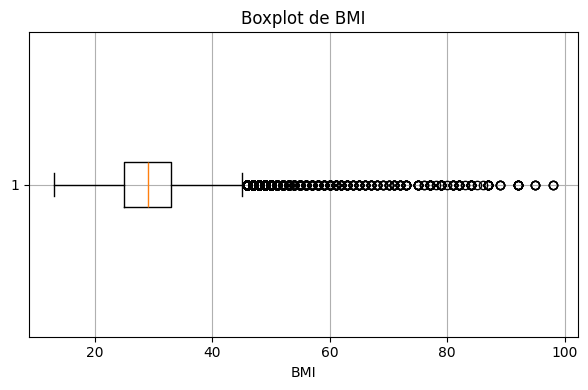

In [ ]:
# Verificación con boxplots si no existen outliers.

import matplotlib.pyplot as plt
df1=df.copy()

# Seleccionar solo columnas numéricas
# Generar un boxplot para cada variable numérica
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df1[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Se remueven los datos atipicos para tener una mejor data.
def quitar_outliners_iqr(dataframe,columna):
  Q1=dataframe[columna].quantile(0.25)
  Q3=dataframe[columna].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return dataframe[(dataframe[columna] >= lower_bound) & (dataframe[columna] <= upper_bound)]
df_limpio=df1.copy()
for columna in columnas_numericas:
  df_limpio=quitar_outliners_iqr(df_limpio,columna)
new_shape = df_limpio.shape
new_shape

(61667, 22)

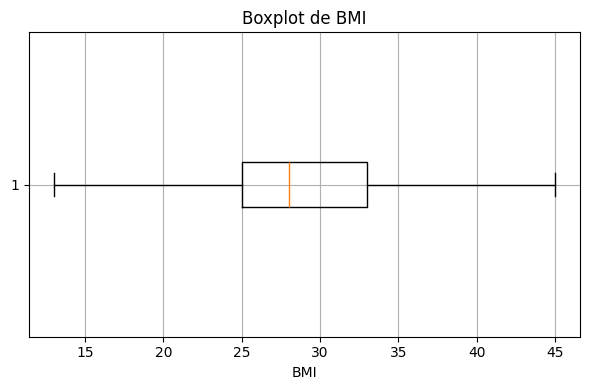

In [ ]:
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_limpio[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Normalizacion de datos
Para trabajar de mejor manera con la variable BMI es necesario normalizarla.

In [ ]:
df_normalizado=df_limpio.copy()
for columna in columnas_numericas:
  media=df_normalizado[columna].mean()
  std=df_normalizado[columna].std()
  df_normalizado[columna]=(df_normalizado[columna]-media)/std
stats_normales=df_normalizado[columnas_numericas].describe()
display(stats_normales)

,BMI
count,6.166700e+04
mean,-2.264123e-17
std,1.000000e+00
min,-2.833216e+00
25%,-7.253942e-01
50%,-1.984389e-01
75%,6.798200e-01
max,2.787641e+00


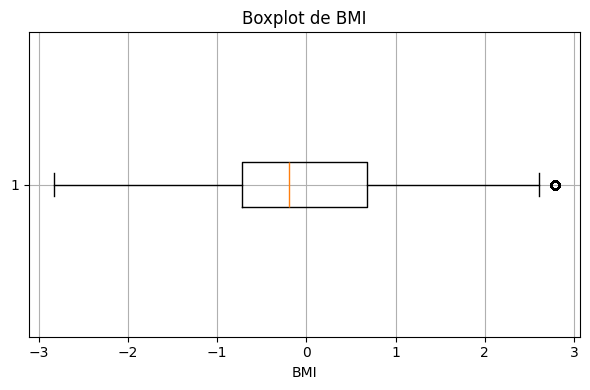

In [ ]:
# Generar un boxplot para cada variable numérica
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_normalizado[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Dummies
Es necesario generar variables dummy para las categoricas.

Para esto se elimina la primera de cada una con el fin de evitar la colinealidad.


In [ ]:
df_normalizado[columnas_categoricas] = df_normalizado[columnas_categoricas].astype(str)

# Aplicamos one-hot encoding (dummies)
df_dummies = pd.get_dummies(df_normalizado, columns=columnas_categoricas, drop_first=True)

# Mostramos las primeras columnas resultantes
df_dummies.head()



,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,...,Age_12.0,Age_13.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0
0,1.0,-1.076698,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1.0,0.679820,1.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,...,False,True,False,False,False,False,False,False,False,False
2,1.0,-0.374091,1.0,0.0,0.0,1.0,0.0,2.0,0.0,5.0,...,False,False,False,False,False,False,False,False,True,False
3,1.0,-0.022787,1.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0,...,False,False,False,False,False,False,False,True,False,False
5,1.0,-1.428001,0.0,0.0,0.0,1.0,0.0,4.0,30.0,30.0,...,False,False,False,False,False,False,True,False,False,False


#Filtro de variables
El siguiente paso es filtrar los datos.
Las columnas que no son utilizadas, seràn droppeadas, esto se realiza en este punto ya que hasta este momento, estabamos sujetos a alterar las variables, por lo que a partir de ahora, trabajaremos solo con las escogidas.

In [ ]:
columnas_a_quitar = ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'AnyHealthcare',
                     'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
                     'Education', 'Income', 'CholCheck']

df_filtrado = df_dummies.drop(columns=columnas_a_quitar + ['Diabetes_binary_1.0'])



#2.Generar datos de prueba y entrenamiento
Aqui generamos los datos de prueba y de entrenamiento para el modelo.
X son todas las variables menos la diabetes.

Y es lo que quremos predecir, si se tiene diabetes o no.

In [ ]:
X = df_filtrado
y = df_dummies['Diabetes_binary_1.0']
y.head()

,Diabetes_binary_1.0
0,True
1,False
2,False
3,False
5,False


#Division
Dividimos los datos en una proporcion de 80% 20% para el entratamiento y testeo de los modelos.

In [ ]:
#GENERACION ED LOS TRAIN Y TEST
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (49333, 20)
Dimensiones de X_test: (12334, 20)
Dimensiones de y_train: (49333,)
Dimensiones de y_test: (12334,)


In [ ]:
y_test

,Diabetes_binary_1.0
59374,False
6921,False
42824,False
46473,False
41916,True
...,...
33152,False
32309,False
17585,True
54406,False


#3 Entrenamiento de modelos

Para cada metodo es necesario entrenar primero, siendo este un proceso que puede llegar a tardar algunos minutos. Posteriormente, se realiza la evaluacion respectiva y se mantiene el modelo con la mejor precisión  al final.
Probaremos:


*   KNN
*   Regresion logistica
*   Arboles de decision

El flujo para los modelos será:
*   Entrenamiento del modelo
*   Prediccion del modelo
*   Matriz de confusion del modelo
*   Estadisticas del modelo
*   Evaluacion

#3.1 Entrenamiento de un modelo de clasificación con el algoritmo KNN
Aqui entrenamos usando diferentes metodos. En esta primera iteracion usarmos KNN.


El valor óptimo de k es: 27


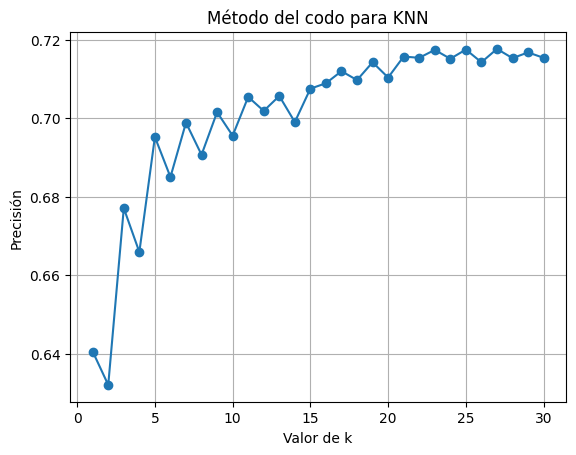

In [ ]:

#ENTRENAMIENTO DE KNN

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Lista para almacenar los valores de precisión para diferentes valores de k
accuracy_values = []

# Rango de valores de k a probar
k_values = range(1, 31)  # Prueba valores de k desde 1 hasta 30

for k in k_values:
    # Crea un modelo KNN con el valor actual de k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Entrena el modelo
    knn_model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = knn_model.predict(X_test)

    # Calcula la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Encuentra el valor óptimo de k
optimal_k = k_values[np.argmax(accuracy_values)]
print(f"El valor óptimo de k es: {optimal_k}")


# Grafica los resultados para visualizar el método del codo
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel("Valor de k")
plt.ylabel("Precisión")
plt.title("Método del codo para KNN")
plt.grid(True)
plt.show()

In [ ]:
# Creamos el modelo KNN con k=9
knn_model = KNeighborsClassifier(n_neighbors=9)

# Entrenamos el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de evalaución
y_pred = knn_model.predict(X_test)
y_pred

array([ True, False, False, ...,  True,  True,  True])

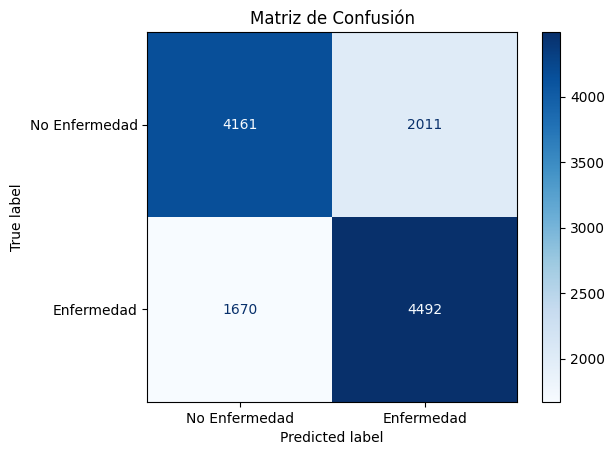

In [ ]:
# Matriz de confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crea un objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Enfermedad', 'Enfermedad'])

# Grafica la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
 # Calcular las métricas de clasificación
from sklearn.metrics import classification_report

# Calcula el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.71      0.67      0.69      6172
        True       0.69      0.73      0.71      6162

    accuracy                           0.70     12334
   macro avg       0.70      0.70      0.70     12334
weighted avg       0.70      0.70      0.70     12334



#Análisis
Las estadisticas son de alrededor del 70% o menos. El algoritmo funciona para predecir, pero no es tan elevado. Como es el primer algoritmo que se corre, no podemos estar seguros si será el seleccionado.

#3.2 Regresion Logistica
Usaremos aqui regresion logística como metodo para entrenar nuestro modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de regresión logística.
# No usaremos ningún hiperparámetro en el modelo.
logreg_model = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    penalty='l2',
    C=1,
    class_weight='balanced'
)
# Entrenar el modelo
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49333 entries, 22915 to 58224
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BMI                    49333 non-null  float64
 1   HighBP_1.0             49333 non-null  bool   
 2   HighChol_1.0           49333 non-null  bool   
 3   PhysActivity_1.0       49333 non-null  bool   
 4   Fruits_1.0             49333 non-null  bool   
 5   Veggies_1.0            49333 non-null  bool   
 6   HvyAlcoholConsump_1.0  49333 non-null  bool   
 7   Sex_1.0                49333 non-null  bool   
 8   Age_10.0               49333 non-null  bool   
 9   Age_11.0               49333 non-null  bool   
 10  Age_12.0               49333 non-null  bool   
 11  Age_13.0               49333 non-null  bool   
 12  Age_2.0                49333 non-null  bool   
 13  Age_3.0                49333 non-null  bool   
 14  Age_4.0                49333 non-null  bool   
 15  Age

In [ ]:

y_pred_RL = logreg_model.predict(X_test)
y_pred_RL

array([ True, False, False, ...,  True,  True,  True])

In [ ]:
X.columns.tolist()

['BMI',
 'HighBP_1.0',
 'HighChol_1.0',
 'PhysActivity_1.0',
 'Fruits_1.0',
 'Veggies_1.0',
 'HvyAlcoholConsump_1.0',
 'Sex_1.0',
 'Age_10.0',
 'Age_11.0',
 'Age_12.0',
 'Age_13.0',
 'Age_2.0',
 'Age_3.0',
 'Age_4.0',
 'Age_5.0',
 'Age_6.0',
 'Age_7.0',
 'Age_8.0',
 'Age_9.0']

In [ ]:
y

,Diabetes_binary_1.0
0,True
1,False
2,False
3,False
5,False
...,...
63617,True
63618,False
63619,False
63620,True


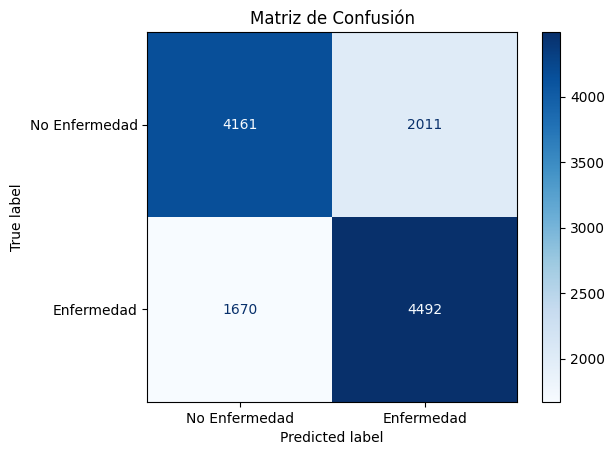

In [ ]:
# Matriz de confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculo de la matriz de confusión
cm_RL = confusion_matrix(y_test, y_pred_RL)

# Crear un objeto ConfusionMatrixDisplay
disp_RL = ConfusionMatrixDisplay(confusion_matrix=cm_RL, display_labels=['No Enfermedad', 'Enfermedad'])

# Grafica de la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#calculamos las estaditicas
print(classification_report(y_test, y_pred_RL))

              precision    recall  f1-score   support

       False       0.75      0.70      0.72      6172
        True       0.71      0.76      0.74      6162

    accuracy                           0.73     12334
   macro avg       0.73      0.73      0.73     12334
weighted avg       0.73      0.73      0.73     12334



#Analisis
Este modelo tiene mejores estadisticasque el anterior, aunque tiene tendencia a predecir mas True que False, es una buena opcion.
Al ser un problema binario, es decir de si o no, se puede decir que es el modelo mas adecuado para este problema, porque nuestro resultado es tiene diabetes y no tiene diabetes, binario. La matriz de confusion es igual al anterior

#3.3 Arboles de decisión
Usaremos arboles de decisión

In [ ]:
# Generar un modelo de árboles de decisión con los datos X_train, y_train
from sklearn.tree import DecisionTreeClassifier

# Crear una instancia del modelo de árbol de decisión
dt_model = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=10,             # Limita la profundidad del árbol
    min_samples_split=20,     # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10,      # Mínimo de muestras en una hoja
    class_weight='balanced',  # Si hay desbalance
    random_state=42           # Para reproducibilidad
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [ ]:
y_pred_DT = dt_model.predict(X_test)
y_pred_DT

array([ True,  True, False, ...,  True,  True,  True])

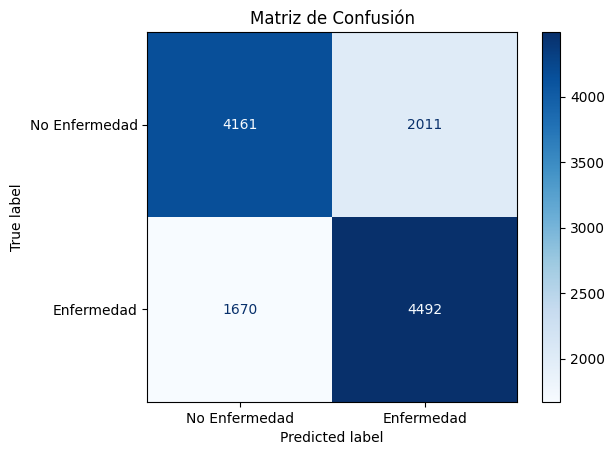

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcula la matriz de confusión
cm_DT = confusion_matrix(y_test, y_pred_DT)

# Crea un objeto ConfusionMatrixDisplay
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=['No Enfermedad', 'Enfermedad'])

# Grafica la matriz de confusión
disp.plot(cmap=plt.cm.Blues) # Puedes cambiar el mapa de color
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Calcular las métricas de clasificación
from sklearn.metrics import classification_report

# Calcula el reporte de clasificación
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

       False       0.74      0.66      0.70      6172
        True       0.69      0.77      0.73      6162

    accuracy                           0.71     12334
   macro avg       0.72      0.71      0.71     12334
weighted avg       0.72      0.71      0.71     12334



#Analisis
Este modelo tien estadisticas similares al primero en terminos de precision y las demas estadisticas, pero este no es el seleccionado.

#4 Exportar los resultados
El modelo que mejor resultado tuvo fue el de regresion, con un 73% de precision global. Tomando en cuenta las estadisticas del modelo podemos concluir que el modelo esta relativamente bien balanceado, aunque es necesario mencionar que reconoce ligeramente mejor los True que los false.
Para poder usarlo, lo exportaremos para usarlo en un backend que conectara con un front end.

In [ ]:
import joblib
#asi exporto las columnas que ocupe
columnas = list(X.columns)  # X es tu DataFrame de entrada al modelo
joblib.dump(columnas, 'columnas.pkl')
#asi exporto el modelo
# Guardar modelo
joblib.dump(logreg_model, 'logreg_model.pkl')

# Guardar columnas usadas
joblib.dump(list(X_train.columns), 'columnas.pkl')

['columnas.pkl']